<h1>Red wine quality classification</h1>

The goal of this project is to predict wine quality from physicochemical properties.<br><br>

Supervised machine learning method implementation step are:
<ol>
  <li>EDA</li>
  <li>feature engineering</li>
  <li>feature selection</li>
  <li>classification</li>
  <li>discussion</li>
</ol>

<b>Conclusion</b><br>
Under-represented classes 3, 4 and 8 were hard to predict. After applying SMOTE over-sampling technique, ROC-AUC metric of xgboost surpasses 0.97 and random forest - 0.94.

<h2>About the dataset:</h2><br>
link to the dataset at Kaggle: <a href="https://www.kaggle.com/danielpanizzo/wine-quality">https://www.kaggle.com/danielpanizzo/wine-quality</a>

Citation Request:
This dataset is public available for research. The details are described in [Cortez et al., 2009].
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Title: Wine Quality

Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.

Number of Instances: red wine - 1599; white wine - 4898.

Number of Attributes: 11 + output attribute

Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Missing Attribute Values: None

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

<h2>1. EDA</h2>

In [ ]:
# importing libraries
from platform import python_version
import warnings

# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy
import scipy.stats as stats # for Q-Q plots

# for plotting
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
import scipy
import scipy.stats as stats # for Q-Q plots

# for oversampling
import imblearn
from imblearn.over_sampling import SMOTE

# for validation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# for classification
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

# for evaluation
from sklearn.metrics import confusion_matrix

# for saving weights
import joblib

In [ ]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)
print('Sklearn version:',sklearn.__version__)
print('XGBoost version:',xgboost.__version__)
print('Imblearn version:',imblearn.__version__)

Python version: 3.7.14
NumPy version: 1.21.6
Pandas version: 1.3.5
SciPy version: 1.7.3
Sklearn version: 1.0.2
XGBoost version: 0.90
Imblearn version: 0.8.1


In [ ]:
# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [ ]:
# importing the dataset
df = pd.read_csv("wineQualityReds.csv", index_col=0)
print(f"{df.shape[1]} columns, {df.shape[0]} rows")
# checking duplicated rows
print(f"{df.duplicated().sum()} duplicated rows")
print('removing duplicates...')
df.drop_duplicates(inplace=True)
print(f"{df.duplicated().sum()} duplicated rows")
df.head()

12 columns, 1599 rows
240 duplicated rows
removing duplicates...
0 duplicated rows


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# showing data types
df.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by percent of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
# identifying categorical values
# capturing type object
cat_vars = ['quality']
cat_vars


['quality']

<h3>Numerical variables</h3>

In [ ]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars]
num_vars

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

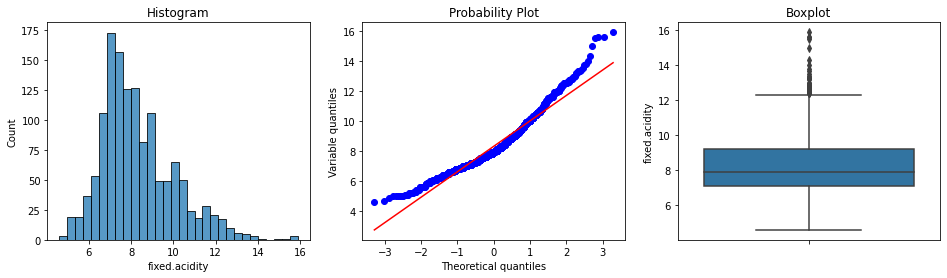

Skewnessis of fixed.acidity is 0.94


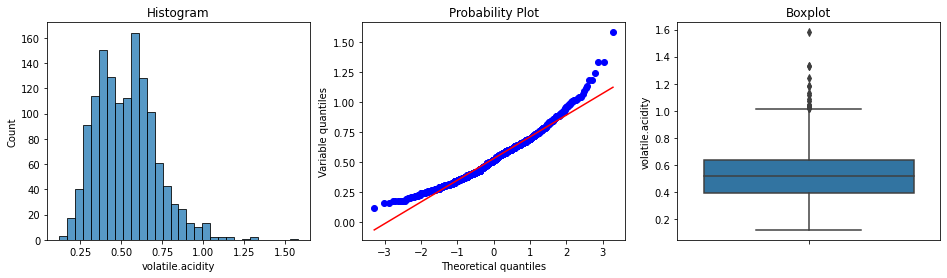

Skewnessis of volatile.acidity is 0.73


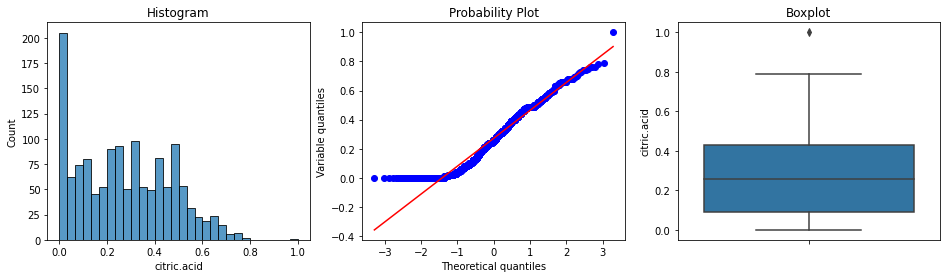

Skewnessis of citric.acid is 0.31


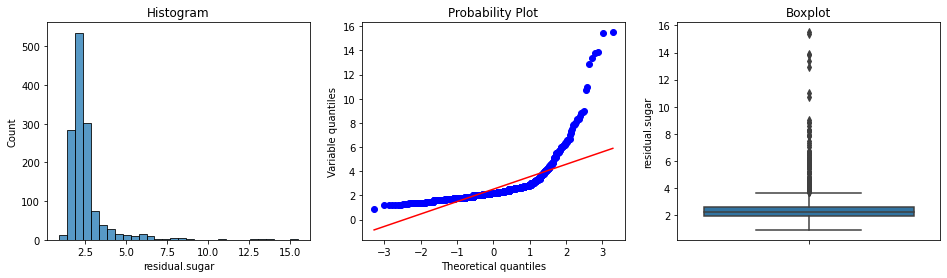

Skewnessis of residual.sugar is 4.55


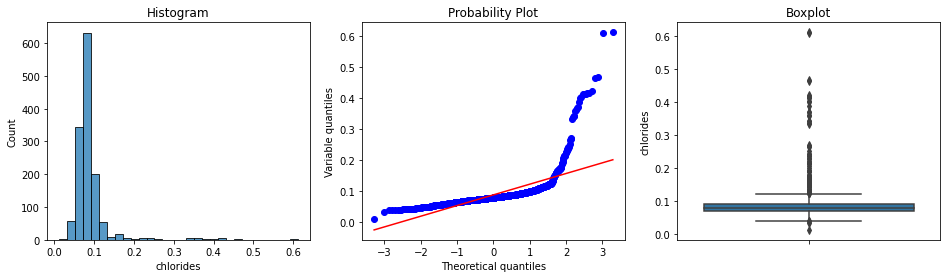

Skewnessis of chlorides is 5.50


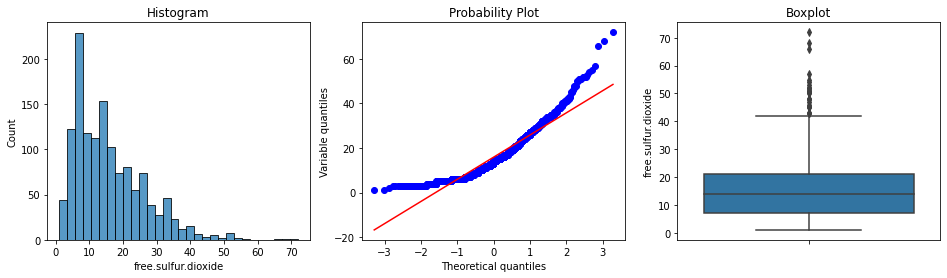

Skewnessis of free.sulfur.dioxide is 1.23


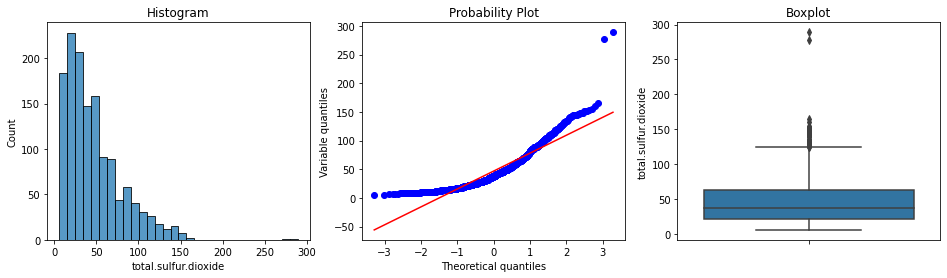

Skewnessis of total.sulfur.dioxide is 1.54


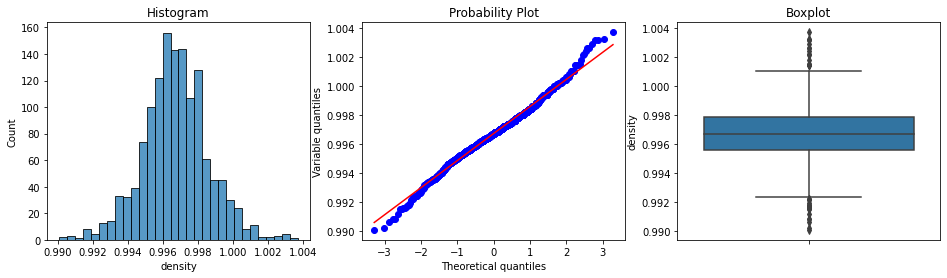

Skewnessis of density is 0.04


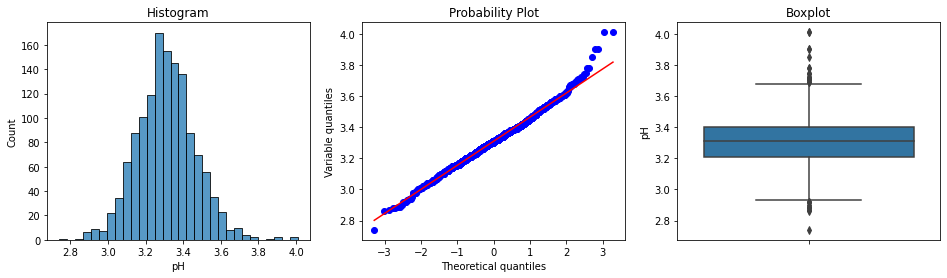

Skewnessis of pH is 0.23


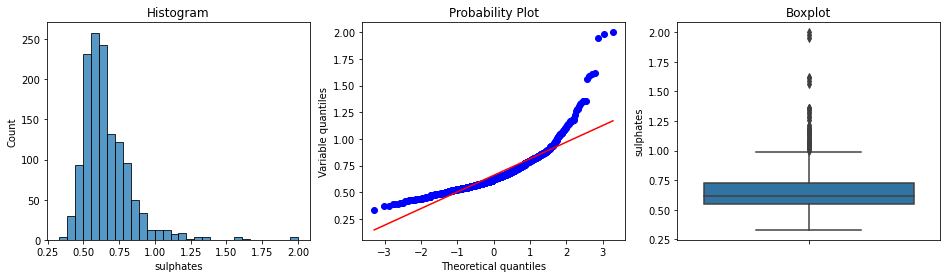

Skewnessis of sulphates is 2.41


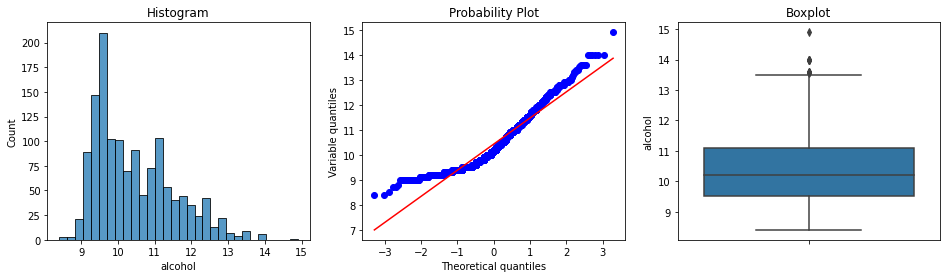

Skewnessis of alcohol is 0.86


In [ ]:
# plotting NO2 variable
for variable in num_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("Skewnessis of", variable, "is {:.2f}".format(skewness))

Discussion: possible outliers in 'volatile.acidity', 'citric.acid' and 'total.sulfur.dioxide'.

<h3>Categorical variable</h3>

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64



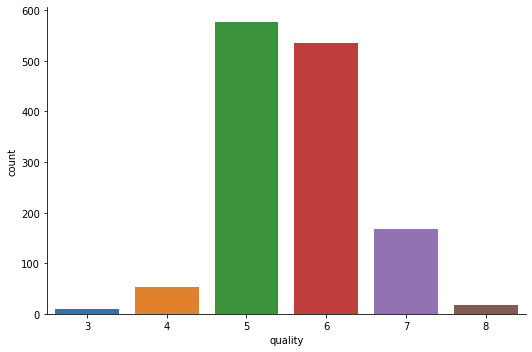

In [ ]:
# plotting quality variable
print(df['quality'].value_counts(dropna=False),end='\n\n')
ax = sns.catplot('quality', data=df, kind='count', aspect=1.5)

Discussion: classes 3 and 8 are under-represented.

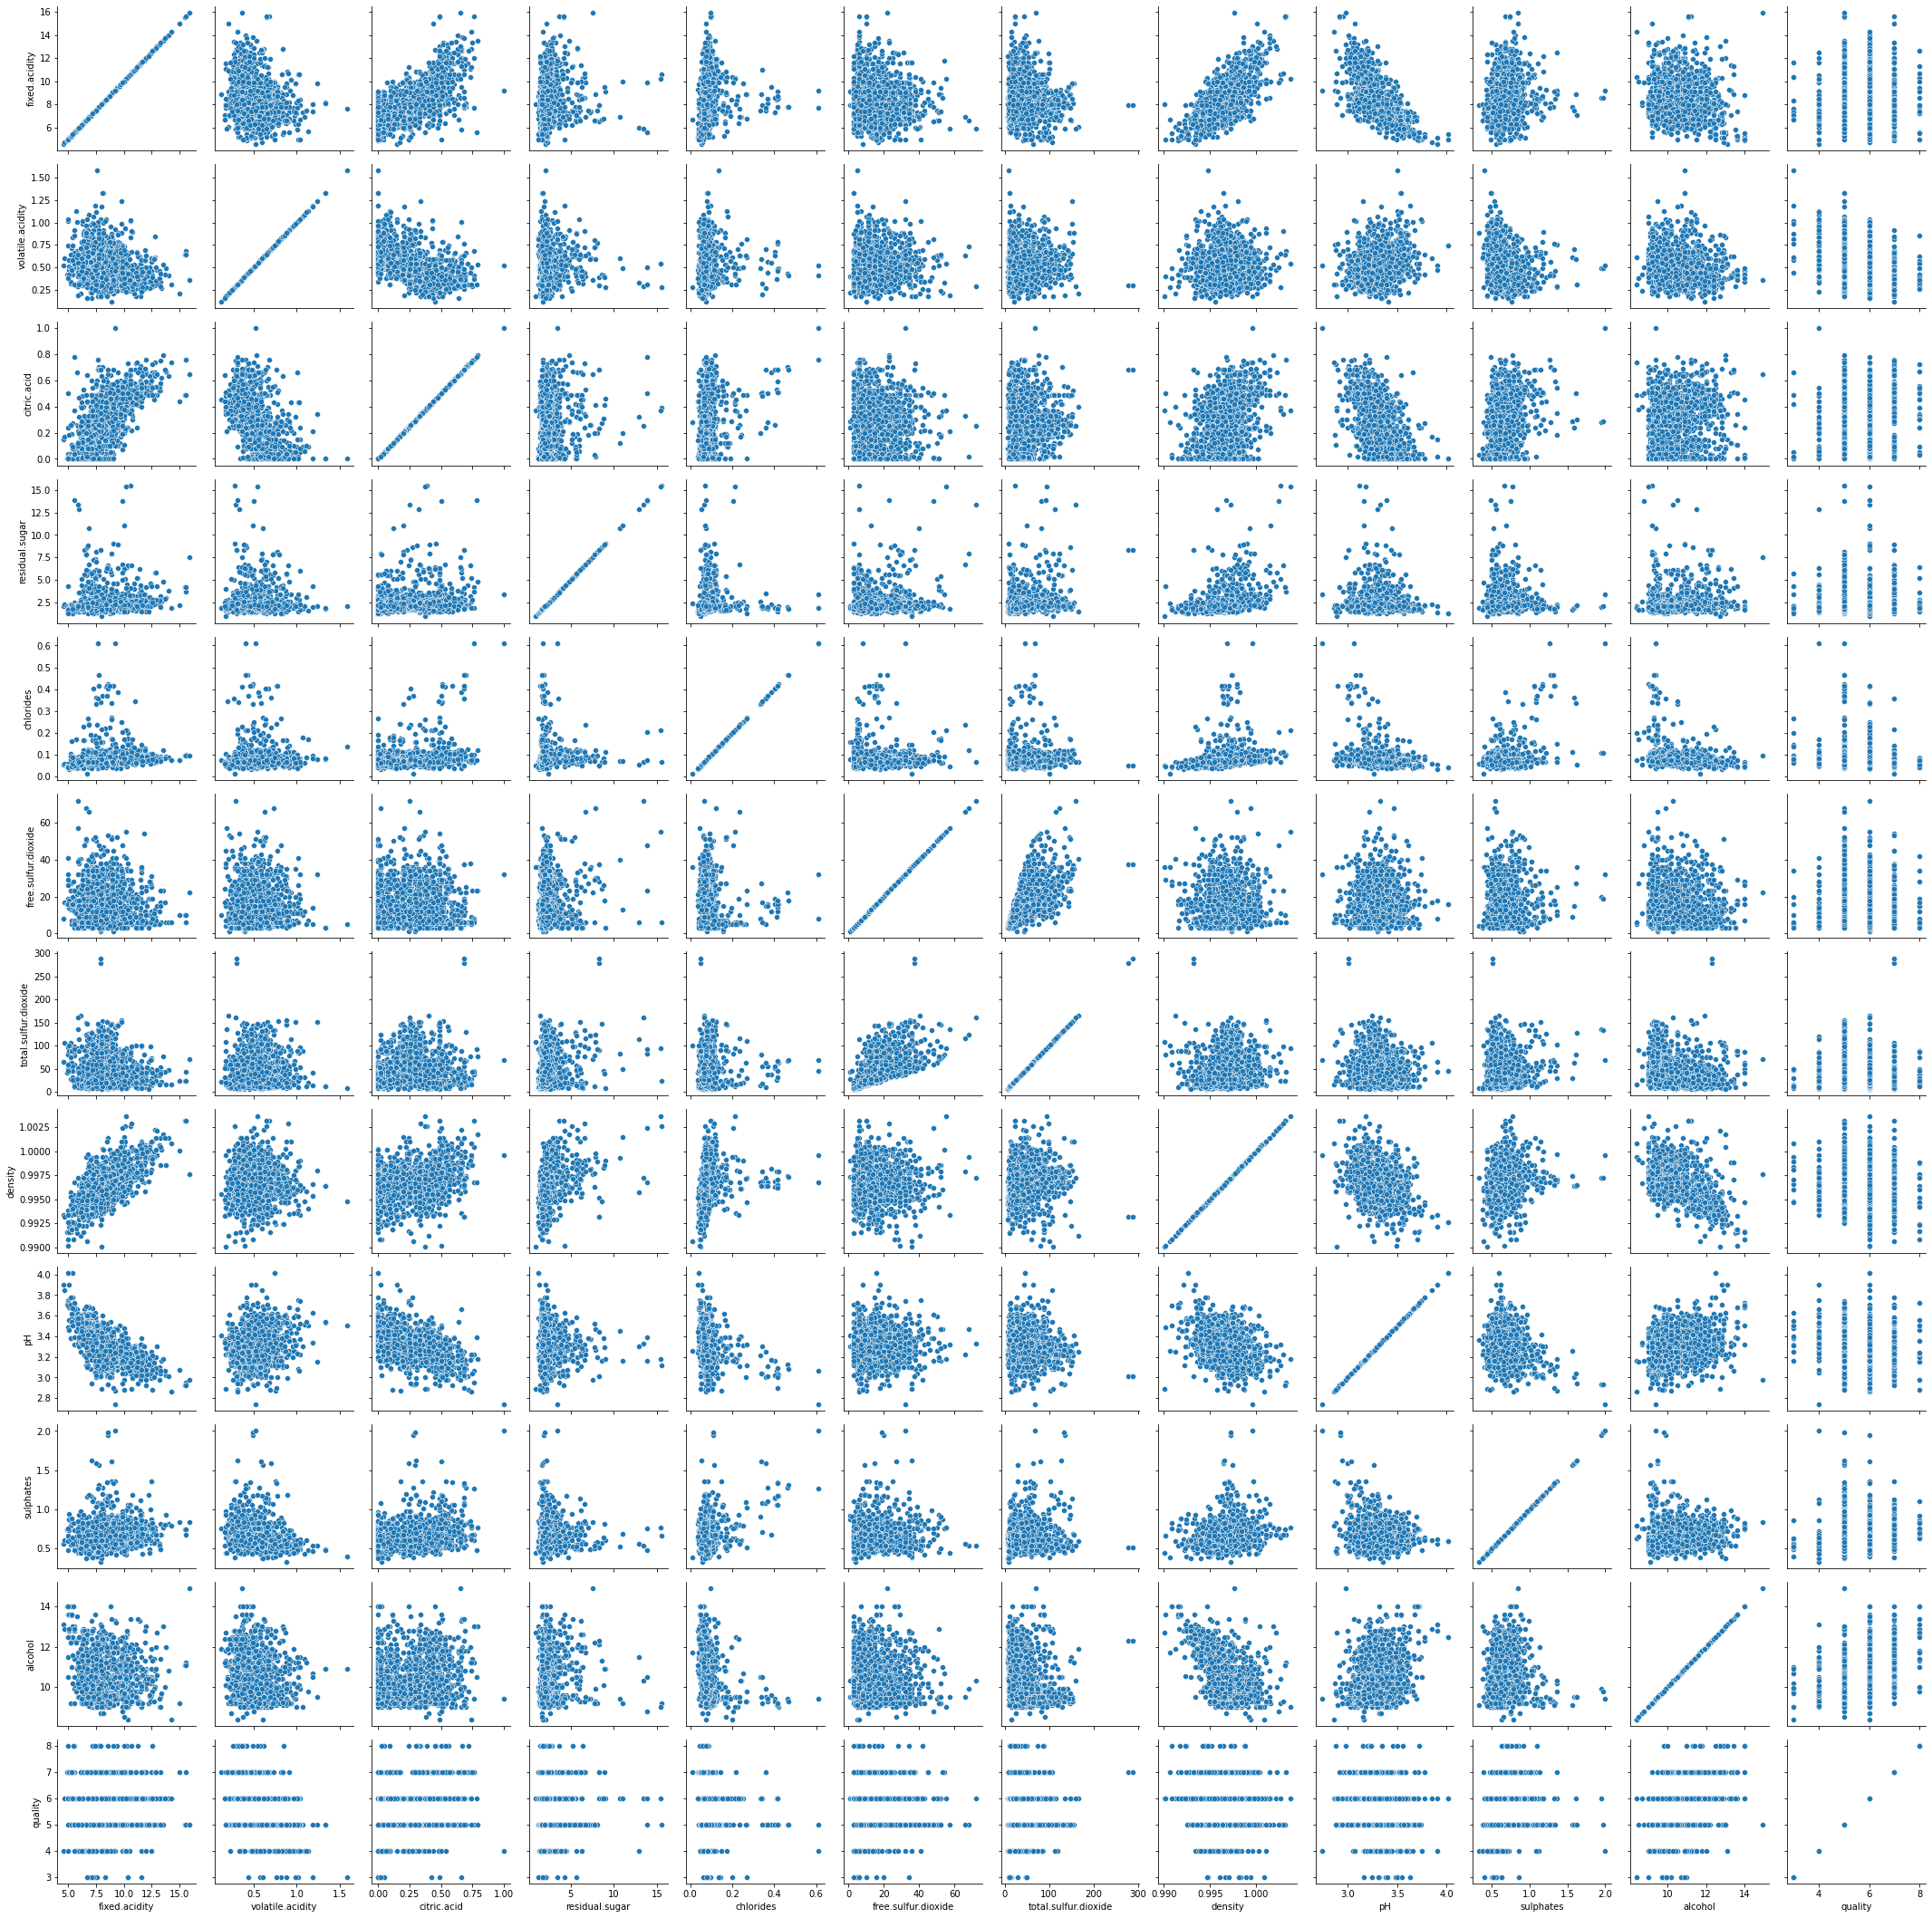

In [ ]:
# plotting scatterplots with pairs of numerical variables
g = sns.PairGrid(df)
g.map(sns.scatterplot)

Discussion:<br>
'fixed.acidity', 'citric.acid', 'density' and 'pH' are correlated.<br>
class varies with all the variables.

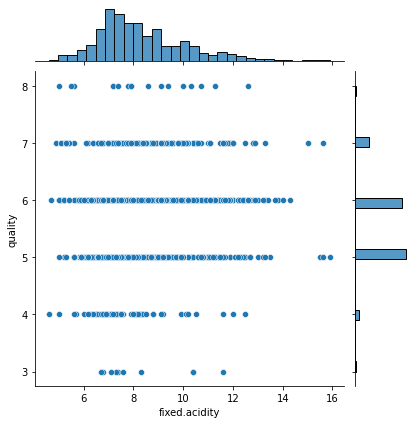

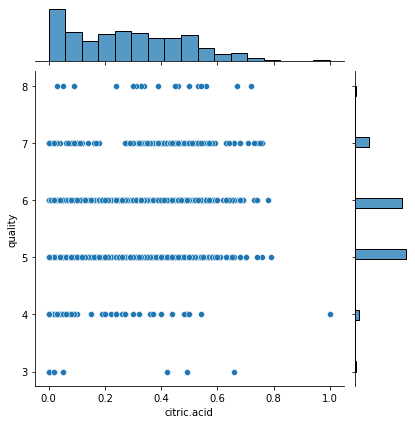

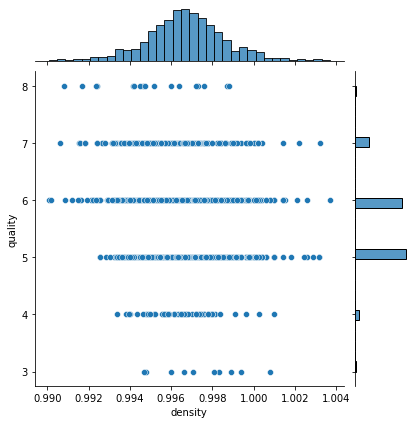

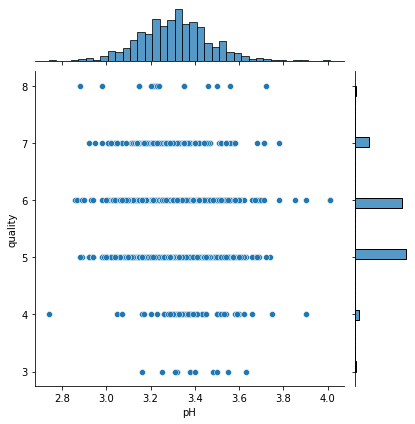

In [ ]:
# closer look at correlated variables
sns.jointplot(data=df, x='fixed.acidity', y='quality')
sns.jointplot(data=df, x='citric.acid', y='quality')
sns.jointplot(data=df, x='density', y='quality')
sns.jointplot(data=df, x='pH', y='quality')

Discussion: influence of the correlated variables on quality is similar, but not the same.

<h2>2. Feature Engineering</h2>

Proceeding with original variables.

<h2>3. Feature Selection</h2>

Working with all the numerical variables as features.

In [ ]:
# defining variables
X = df[num_vars].values
y = df[cat_vars].values

In [ ]:
# oversampling with SMOTE
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

<h2>4. Classificarion</h2>

In [ ]:
# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify=y, random_state = 42)

<h3>Random forest classification</h3>

In [ ]:
# defining a classifier
classifier_rf = RandomForestClassifier(random_state = 42)

In [ ]:
# applying k-fold cross validation
f1_macro = cross_val_score(
    estimator = classifier_rf, X = X_train, y = y_train,
    scoring='f1_macro', cv = 10)
print("f1_macro: {:.2f} %".format(f1_macro.mean()*100))
print("Standard Deviation: {:.2f} %".format(f1_macro.std()*100))

f1_macro: 82.65 %
Standard Deviation: 1.58 %


In [ ]:
# fitting the classifier and predicting y_test
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)

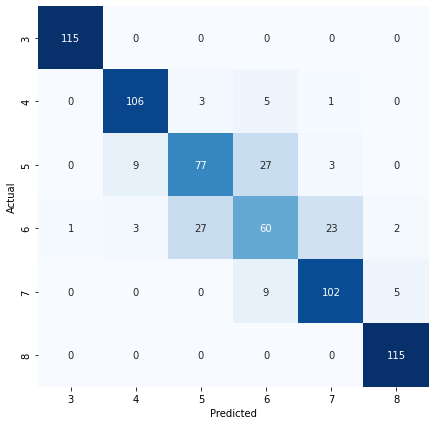

In [ ]:
# printing a confusion matrix
cm = confusion_matrix(y_test, y_pred)
index=["3", "4", "5", "6", "7", "8"]
columns=["3", "4", "5", "6", "7", "8"]
df_cm = pd.DataFrame(data=cm, index=index, columns=columns)
plt.figure(figsize=(7,7))
ax = sns.heatmap(df_cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:
# scoring
y_prob = classifier_rf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f}"
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f}"
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.970649 (macro),
0.970547(weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.970536 (macro),
0.970421(weighted by prevalence)


<h3>XGBoost classification</h3>

In [ ]:
# defining a classifier
classifier_xg = XGBClassifier(random_state = 42)

In [ ]:
# applying k-fold cross validation
f1_macro = cross_val_score(
    estimator = classifier_xg, X = X_train, y = y_train,
    scoring='f1_macro', cv = 10)
print("f1_macro: {:.2f} %".format(f1_macro.mean()*100))
print("Standard Deviation: {:.2f} %".format(f1_macro.std()*100))

f1_macro: 74.85 %
Standard Deviation: 1.39 %


In [ ]:
# fitting the classifier and predicting y_test
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_test)

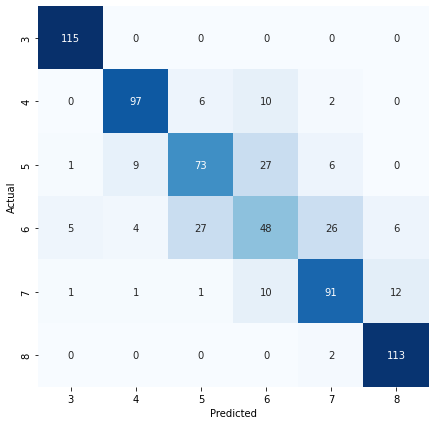

In [ ]:
# printing a confusion matrix
cm = confusion_matrix(y_test, y_pred)
index=["3", "4", "5", "6", "7", "8"]
columns=["3", "4", "5", "6", "7", "8"]
df_cm = pd.DataFrame(data=cm, index=index, columns=columns)
plt.figure(figsize=(7,7))
ax = sns.heatmap(df_cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:
# scoring
y_prob = classifier_xg.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f}"
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f}"
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.948042 (macro),
0.947900(weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.947901 (macro),
0.947721(weighted by prevalence)


<h2>5. Discussion</h2>

Under-represented classes 3, 4 and 8 were hard to predict. After applying SMOTE over-sampling technique, ROC-AUC metric of xgboost surpasses 0.94 and random forest - 0.97.